# Polygon module: examples
    by Gerrit Nowald
Python module to calculate geometric properties of arbitrary 2D polygons:
- area, lengths of edges, inner angles
- order of vertices (clockwise or anti-clockwise)
- centroid (center of mass)
- triangles: centers and radii of incircle and circumscribed (outer) circle
- solid of revolution: volume, surface areas, center of mass
- second moment of area (bending stiffness of beams)
- check if point is inside or on edge of polygon
- translation, rotation and scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'..')
from polygon_math import polygon

## Calculate basic geometrical properties of a 2D shape
- Generate a polygon object from random vertices:

In [2]:
Vertices = np.random.rand(3,2)*10

triangle = polygon(Vertices)

triangle

polygon([[4.15663356 8.87372921]
 [6.45511548 0.5619558 ]
 [8.33900811 3.57603387]
 [4.15663356 8.87372921]], axis=None)

In [3]:
print(triangle)
print(f'Vertices clockwise: {triangle.IsClockwise}')

Polygon with 3 vertices
Vertices clockwise: False


- Plot contour of polygon with middle points of edges as well as centroid (center of mass), circumscribed circle and incircle:

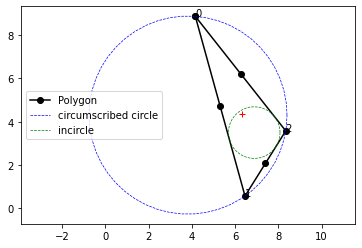

In [4]:
plt.figure()
triangle.plot('ko-', numbers=True, label='Polygon')
triangle.plotCenterMass()
triangle.plotCenterEdges()
triangle.plotOutCircle('b--', linewidth=0.7, label='circumscribed circle')
triangle.plotIncircle( 'g--', linewidth=0.7, label='incircle')
plt.legend()
plt.show()

- Basic geometric properties:

In [5]:
print(f"Area: { np.round( abs(triangle), 1) }")
print(f"Lengths of edges: { [ np.round(Length, 1) for Length in triangle.EdgesLength ] }")
print(f"Inner angles: { [ int(Angle) for Angle in triangle.Angles ] }°")

Area: 11.3
Lengths of edges: [8.6, 3.6, 6.7]
Inner angles: [22, 47, 109]°


## Check if points are inside of a polygon
- generate a polygon object

In [6]:
Vertices = [
    [0, 0],
    [1.75, 4],
    [1.5, 6],
    [1, 7],
    [0.25, 6],
    [0, 5],
    [-0.25, 6],
    [-1, 7],
    [-1.5, 6],
    [-1.75, 4],
    ]

heart = polygon(Vertices)

- generate random points to be tested

In [7]:
N = 1000
points = np.hstack(( np.random.rand(N,1)*6 - 3, np.random.rand(N,1)*10 - 2 ))

- test points:

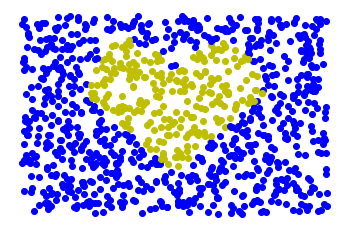

In [8]:
fig, ax = plt.subplots()
for point in points:
    if heart(point):
        style = "yo"
    else:
        style = "bo"
    plt.plot(*point, style)
ax.set_axis_off()

## Calculate mass and surface areas of a rotational-symmetric body
Rotational symmetrical bodies can be described through their 2D cross-sections ([Pappus's centroid theorem](https://en.wikipedia.org/wiki/Pappus%27s_centroid_theorem)).
- define the cross-section and axis of rotation:

In [9]:
Vertices = [
    [2.5, 0],
    [4, 0],
    [4, 6],
    [2.5, 6],
    [1, 4.5],
    [1, 1.5]
]

socket = polygon(Vertices, axis=1)

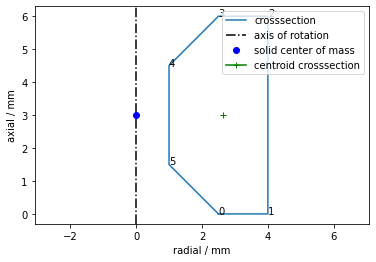

In [10]:
plt.figure()
socket.plot(numbers=True, label='crosssection')
socket.plotRotationAxis(label='axis of rotation')
socket.plotCenterMass('bo', label='solid center of mass')
socket.plotCenterMassCrossSection(label='centroid crosssection')
plt.legend()
plt.xlabel('radial / mm')
plt.ylabel('axial / mm')
plt.axis('equal')
plt.show()

- mass (socket out of brass):

In [11]:
rho = 8530                     # density of brass / kg/m³
V   = abs(socket) * (1e-3)**3  # volume of solid of revolution wrt y-axis / m³
m   = V*rho
print(f"{ np.round(m*1e3, 3) } g")

2.231 g


- surface areas:

In [12]:
print(f"{ [ int(Area) for Area in socket.RotationSurfaces ] } mm²")

[30, 150, 30, 23, 18, 23] mm²


## Calculate deflection of a steal beam under load
The deflection of beams under load can be calculated with the [Euler–Bernoulli beam theory](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory).
The stiffness of the beam is defined by its material and the shape of its cross-section. The latter can be described with the so-called second moment of area.
- define the cross-section:

In [13]:
Vertices = [
    [0, 0],
    [10, 0],
    [10, 1],
    [6, 2],
    [6, 18],
    [10, 19],
    [10, 20],
    [0, 20],
    [0, 19],
    [4, 18],
    [4, 2],
    [0, 1]
]

beam  = polygon(Vertices).centerOrigin()    # move origin of coordinate system to center of mass     

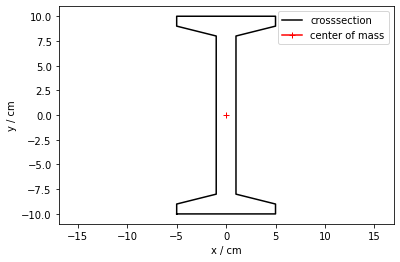

In [14]:
beam.plot('k', label='crosssection')
beam.plotCenterMass(label='center of mass')
plt.legend()
plt.xlabel('x / cm')
plt.ylabel('y / cm')
plt.axis('equal')
plt.show()

- second moment of area:

In [15]:
print(f"second moment of area x-axis: {  int(beam.SecondMomentArea[0]) } cm^4")
print(f"second moment of area y-axis: {  int(beam.SecondMomentArea[1]) } cm^4")
print(f"product second moment of area: { int(beam.SecondMomentArea[2]) } cm^4")

second moment of area x-axis: 3380 cm^4
second moment of area y-axis: 229 cm^4
product second moment of area: 0 cm^4


- deflection of the steal beam under a vertical load in the middle:

In [16]:
l = 5        # length of the beam / m
m = 2e3      # weight / kg

E = 210e9    # Young's modulus steel / Pa
g = 9.81     # gravity constant / m/s²

Ix = beam.SecondMomentArea[0] * (1e-2)**4  # second moment of area / m^4
F  = m*g                                   # force / N
c  = 48*E*Ix / l**3                        # bending stiffness beam (pinned-pinned)
w  = F/c                                   # deflection in the middle / m

print(f'{ np.round(w*1e3, 1) } mm under a load of { m/1e3 } t.')

7.2 mm under a load of 2.0 t.


## Manipulate polygon (move, rotate, scale)
- create polygon object

In [17]:
Vertices = [[0,0],[5,0],[5,2],[4,1]]
P = polygon(Vertices)

- translate, rotate, scale

In [18]:
Ptranslated = P + [3,4]
Protated    = P.rotateClockwise(45, [5,0])
Pscaled     = P / 2

- plot

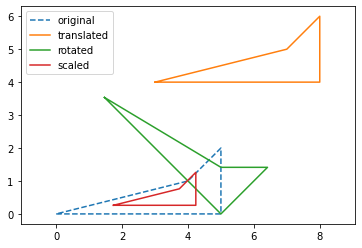

In [19]:
plt.figure()
P.plot('--', label='original')
Ptranslated.plot(label='translated')
Protated.plot(label='rotated')
Pscaled.plot(label='scaled')
plt.legend()
plt.axis('equal')
plt.show()